In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('C:\\Users\\Ayush\\OneDrive - BBTech\\Desktop\\sem 6\\BI\\datasets\\French_fashion_c2c\\6M-0K-99K.users.dataset.public.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  ct                   98913 non-null  object 
 15  hasAnyApp            98913 non-null 

In [3]:
#checking if there is any missing value
df.isna().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
ct                     0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

In [4]:
df.skew() # skew() function is used to check skewness in data

C:\Users\Ayush\AppData\Local\Temp\ipykernel_15444\3754252270.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew() # skew() function is used to check skewness in data


identifierHash           0.001134
socialNbFollowers       88.816910
socialNbFollows        220.876679
socialProductsLiked    244.157743
productsListed          64.893219
productsSold            41.595633
productsPassRate        10.667299
productsWished          49.256959
productsBought          84.797360
civilityGenderId        -1.140820
hasAnyApp                1.067204
hasAndroidApp            4.192538
hasIosApp                1.368601
hasProfilePicture       -7.015544
daysSinceLastLogin      -1.675425
seniority               -0.427090
seniorityAsMonths       -0.427092
seniorityAsYears        -0.427311
dtype: float64

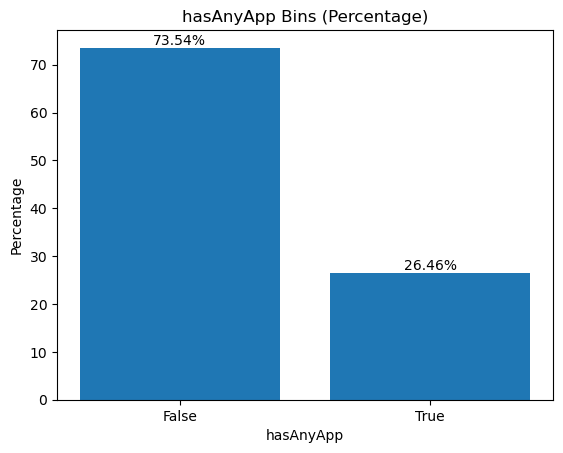

In [5]:
#Basic information of users
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'hasAnyApp' is the column of interest
group_names = ['False', 'True']

# Calculate the value counts and the total count
value_counts = df['hasAnyApp'].value_counts()
total_count = value_counts.sum()

# Calculate the percentage for each group
percentages = (value_counts / total_count) * 100

# Create the bar chart with percentages
bars = plt.bar(group_names, percentages)

# Set x/y labels and plot title
plt.xlabel("hasAnyApp")
plt.ylabel("Percentage")
plt.title("hasAnyApp Bins (Percentage)")

# Add percentage values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()

In [6]:
df_group_two = df[['hasAnyApp','productsBought','productsSold']]
df_group_two = df_group_two.groupby(['hasAnyApp'],as_index=False).agg([np.sum,np.mean])
df_group_two



#Users with mobile app have sightly higher buying power; Buyers without mobile app tend to have slightly higher selling power

productsBought           productsSold          
                     sum      mean          sum      mean
hasAnyApp                                                
False               7957  0.109391         3233  0.044447
True                9049  0.345725         8794  0.335982

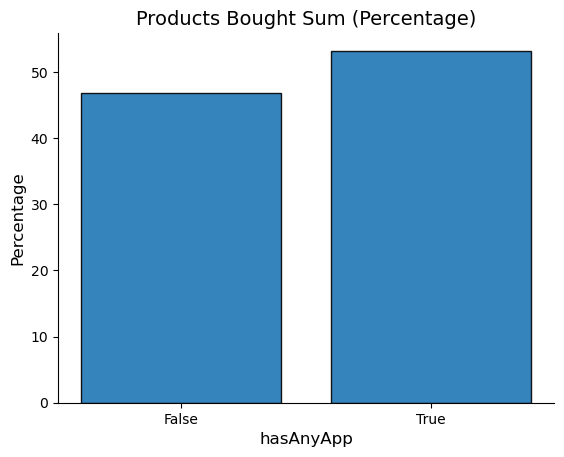

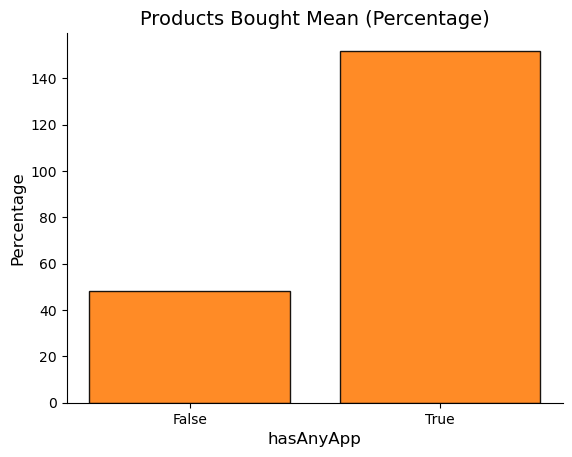

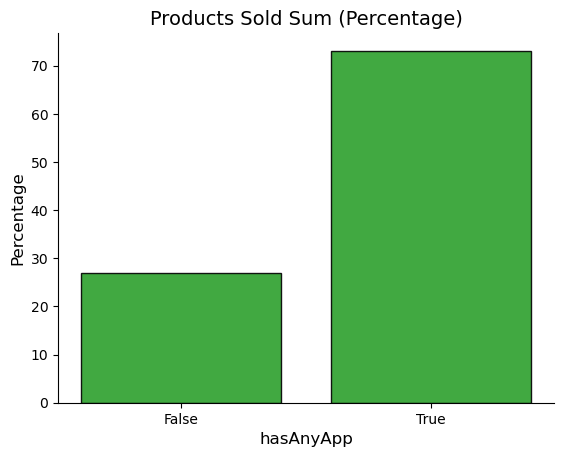

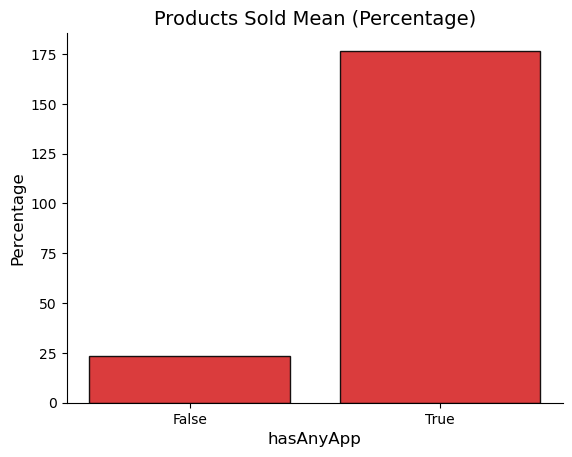

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_group_two is your DataFrame after grouping and aggregation
group_names = ['False', 'True']

# Accessing the sum and mean values correctly
total_sum_productsBought = df_group_two['productsBought', 'sum'].sum()
total_sum_productsSold = df_group_two['productsSold', 'sum'].sum()
total_mean_productsBought = df_group_two['productsBought', 'mean'].mean()
total_mean_productsSold = df_group_two['productsSold', 'mean'].mean()

# Calculate the percentage for each group for sum and mean
percentages_sum_productsBought = (df_group_two['productsBought', 'sum'] / total_sum_productsBought) * 100
percentages_sum_productsSold = (df_group_two['productsSold', 'sum'] / total_sum_productsSold) * 100
percentages_mean_productsBought = (df_group_two['productsBought', 'mean'] / total_mean_productsBought) * 100
percentages_mean_productsSold = (df_group_two['productsSold', 'mean'] / total_mean_productsSold) * 100

# Function to plot bar chart with percentages
def plot_bar_chart(percentages, title, color='blue', edgecolor='black', alpha=0.8):
    fig, ax = plt.subplots()
    bars = ax.bar(group_names, percentages, color=color, edgecolor=edgecolor, alpha=alpha)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom', color='white', fontweight='bold')
    ax.set_xlabel("hasAnyApp", fontsize=12)
    ax.set_ylabel("Percentage", fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

# Plot bar chart for sum of productsBought with custom styling
plot_bar_chart(percentages_sum_productsBought, "Products Bought Sum (Percentage)", color='#1f77b4', edgecolor='#000000', alpha=0.9)

# Plot bar chart for mean of productsBought with custom styling
plot_bar_chart(percentages_mean_productsBought, "Products Bought Mean (Percentage)", color='#ff7f0e', edgecolor='#000000', alpha=0.9)

# Plot bar chart for sum of productsSold with custom styling
plot_bar_chart(percentages_sum_productsSold, "Products Sold Sum (Percentage)", color='#2ca02c', edgecolor='#000000', alpha=0.9)

# Plot bar chart for mean of productsSold with custom styling
plot_bar_chart(percentages_mean_productsSold, "Products Sold Mean (Percentage)", color='#d62728', edgecolor='#000000', alpha=0.9)

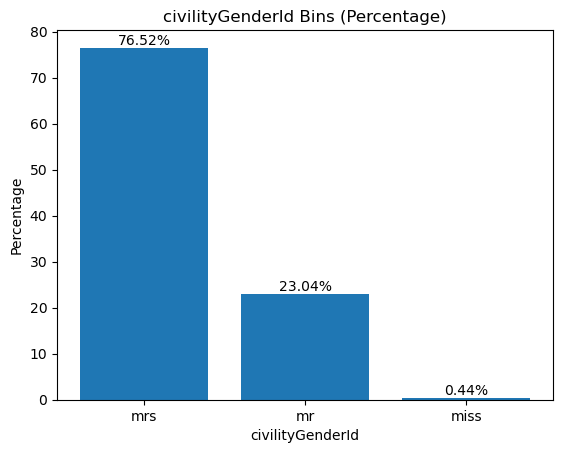

In [8]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'civilityGenderId' is the column of interest
group_names = ['mrs', 'mr', 'miss']

# Calculate the value counts and the total count
value_counts = df['civilityGenderId'].value_counts()
total_count = value_counts.sum()

# Calculate the percentage for each group
percentages = (value_counts / total_count) * 100

# Create the bar chart with percentages
bars = plt.bar(group_names, percentages)

# Set x/y labels and plot title
plt.xlabel("civilityGenderId")
plt.ylabel("Percentage")
plt.title("civilityGenderId Bins (Percentage)")

# Add percentage values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')

# Display the plot
plt.show()

# to show that Married women seem to be the most active users on this site


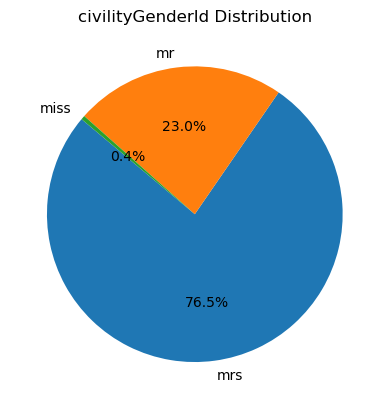

In [9]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'civilityGenderId' is the column of interest
group_names = ['mrs', 'mr', 'miss']

# Calculate the value counts and the total count
value_counts = df['civilityGenderId'].value_counts()
total_count = value_counts.sum()

# Calculate the percentage for each group
percentages = (value_counts / total_count) * 100

# Create the pie chart with percentages
plt.pie(percentages, labels=group_names, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title("civilityGenderId Distribution")

# Display the plot
plt.show()

productsBought           productsSold          
                    sum      mean          sum      mean
language                                                
de                 1705  0.237531          539  0.075091
en                 8918  0.172950         4877  0.094581
es                  797  0.132107          901  0.149345
fr                 4386  0.166313         3004  0.113909
it                 1200  0.154520         2706  0.348442

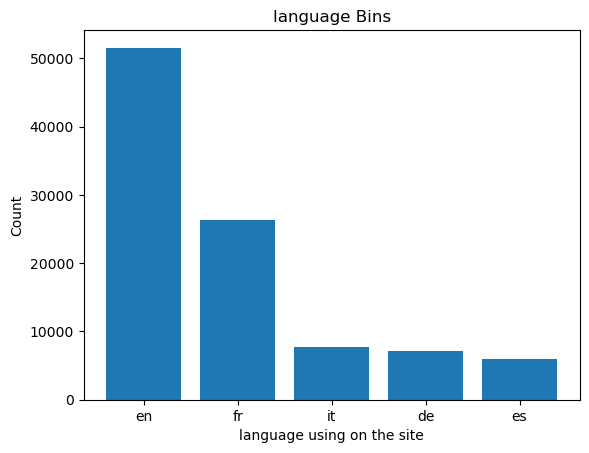

In [10]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
group_names=['en', 'fr', 'it', 'de', 'es']
q=pyplot.bar(group_names, df['language'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("language using on the site")
plt.pyplot.ylabel("Count")
plt.pyplot.title("language Bins")

df_group_three = df[['language','productsBought','productsSold']]
df_group_three = df_group_three.groupby(['language'],as_index=False).agg([np.sum,np.mean])
df_group_three

#Users' first prefer language is English, and the second one is French However, they did not have the highest average productsBought and productsSold.

<AxesSubplot:xlabel='language', ylabel='count'>

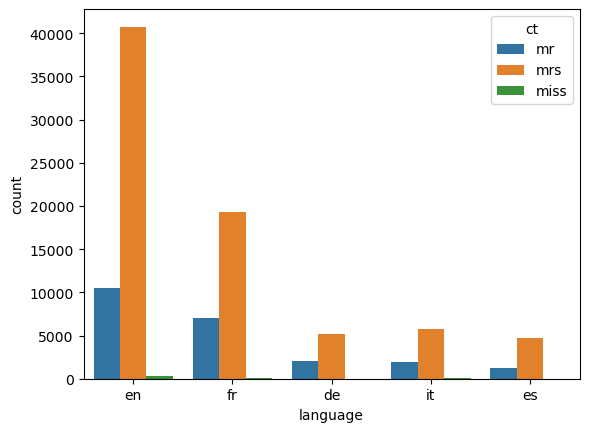

In [11]:
import seaborn as sns
sns.countplot(x='language',data=df,hue='ct')

#countplot tells us that there are more married females users globally.

In [12]:
#fix some issues (inaccuracies in countries data, typos)

# Filter characteristic columns
user_char = df[["country", "countryCode"]]

# Number of unique values in each column
unique_counts = user_char.nunique()
print(unique_counts)

# Filter the countries sharing the same country code
shared_code = (
    df.groupby("countryCode")
    .agg(n=pd.NamedAgg(column="country", aggfunc="nunique"))
    .query("n > 1")
)
unique_countries = df[df["countryCode"].isin(shared_code.index)]["country"].unique()
unique_countries

print(unique_countries)
# we can drop country column now

country        200
countryCode    199
dtype: int64
['Guyane' 'Guyana']


In [13]:
#remove the typo
max_val = df[df["daysSinceLastLogin"] != 737028]["daysSinceLastLogin"].max()
df["daysSinceLastLogin"] = df["daysSinceLastLogin"].replace(737028, max_val)

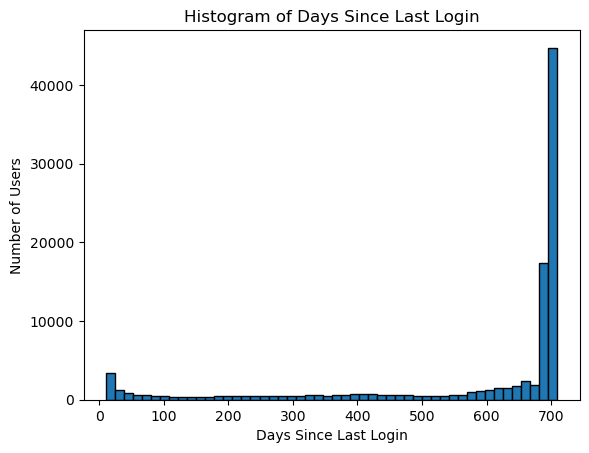

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# Extract the 'dayssincelastlogin' column
days_since_last_login = df['daysSinceLastLogin']

# Create a histogram
plt.hist(days_since_last_login, bins=50, edgecolor='black')

# Add labels and title
plt.xlabel('Days Since Last Login')
plt.ylabel('Number of Users')
plt.title('Histogram of Days Since Last Login')

# Display the histogram
plt.show()

#Insight: There is a noticeable difference in the proportion of items sold and bought via the iOS platform. Out of the total items sold on the platform, 64.2% (7,727 out of 12,027) were sold through the iOS app. However, when looking at the total items bought, only 45.3% (7,668 out of 17,006) were purchased using the iOS app. This indicates that iOS users tend to sell more items on the platform compared to their buying behavior.
#The dataset may cover different timeframes for the purchased, sold, and listed items. For instance, some purchases might have been made before the start date of the dataset, while the sales and listings data only includes transactions within the dataset's timeframe.


In [15]:
#let's see how much these countires generate
df_best = df[df['countryCode'].isin(['fr', 'it', 'gb', 'us', 'es', 'de'])]
print(df_best)

            identifierHash  type      country language  socialNbFollowers  \
0     -1097895247965112460  user  Royaume-Uni       en                147   
2      6870940546848049750  user       France       fr                137   
3     -4640272621319568052  user   Etats-Unis       en                131   
4     -5175830994878542658  user   Etats-Unis       en                167   
5      7631788075812383072  user    Allemagne       de                130   
...                    ...   ...          ...      ...                ...   
98905  3164321379397826945  user   Etats-Unis       en                  3   
98907 -5212100190867739388  user   Etats-Unis       en                  3   
98908 -5324380437900495747  user   Etats-Unis       fr                  3   
98909 -5607668753771114442  user       France       fr                  3   
98911  2006580738726207028  user       Italie       it                  3   

       socialNbFollows  socialProductsLiked  productsListed  productsSold  

In [16]:
##repeat_columns = []
# unused and repeated metadata are dropped
#repeat_columns += ['identifierHash', 'type','country','gender','ct']
#db1=df.drop(repeat_columns,axis=1)
#db1.head()
#let's drop some non-value-added columns
#df = df.drop(['country',"seniorityAsMonths", "seniorityAsYears", "identifierHash", "type", "civilityTitle"], axis=1)
repeat_columns = []
# unused and repeated metadata are dropped
repeat_columns += ['identifierHash', 'type','country','gender','ct','seniorityAsMonths','seniorityAsYears']
db1=df.drop(repeat_columns,axis=1)
db1.head()
print(db1.head(10))
db1.to_csv('drooped_data.csv', index=False)


  language  socialNbFollowers  socialNbFollows  socialProductsLiked  \
0       en                147               10                   77   
1       en                167                8                    2   
2       fr                137               13                   60   
3       en                131               10                   14   
4       en                167                8                    0   
5       de                130               12                    1   
6       en                121                0                 1140   
7       fr                 53                9                    3   
8       it                744            13764                51671   
9       en                 57                8                   45   

   productsListed  productsSold  productsPassRate  productsWished  \
0              26           174              74.0             104   
1              19           170              99.0               0   
2          

In [17]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
df2 = pd.read_csv('C:\\Users\\Ayush\\OneDrive - BBTech\\Desktop\\sem 6\\BI\\datasets\\French_fashion_c2c\\drooped_data.csv')
ordinal_encoder = OrdinalEncoder()

string_columns = ['language', 'countryCode', 'hasAnyApp', 'hasAndroidApp', 'hasIosApp', 'hasProfilePicture']

for var in string_columns:
    var_cat = df2[[var]]  # use double brackets to make sure you're taking a DataFrame
    var_cat_encoded = ordinal_encoder.fit_transform(var_cat)
    var_cat_df = pd.DataFrame(var_cat_encoded)
    var_cat_df.columns = [var + '_encoded']
    df2 = df2.merge(var_cat_df, how='inner', left_index=True, right_index=True)

df3 = df2.drop(string_columns, axis=1)
print(df3.head())

# Save the resulting DataFrame to a CSV file
df3.to_csv('encoded_data_final.csv', index=False)

# Display information about the DataFrame
print(df3.info())


   socialNbFollowers  socialNbFollows  socialProductsLiked  productsListed  \
0                147               10                   77              26   
1                167                8                    2              19   
2                137               13                   60              33   
3                131               10                   14             122   
4                167                8                    0              25   

   productsSold  productsPassRate  productsWished  productsBought  \
0           174              74.0             104               1   
1           170              99.0               0               0   
2           163              94.0              10               3   
3           152              92.0               7               0   
4           125             100.0               0               0   

   civilityGenderId  daysSinceLastLogin  seniority  language_encoded  \
0                 1                  11     

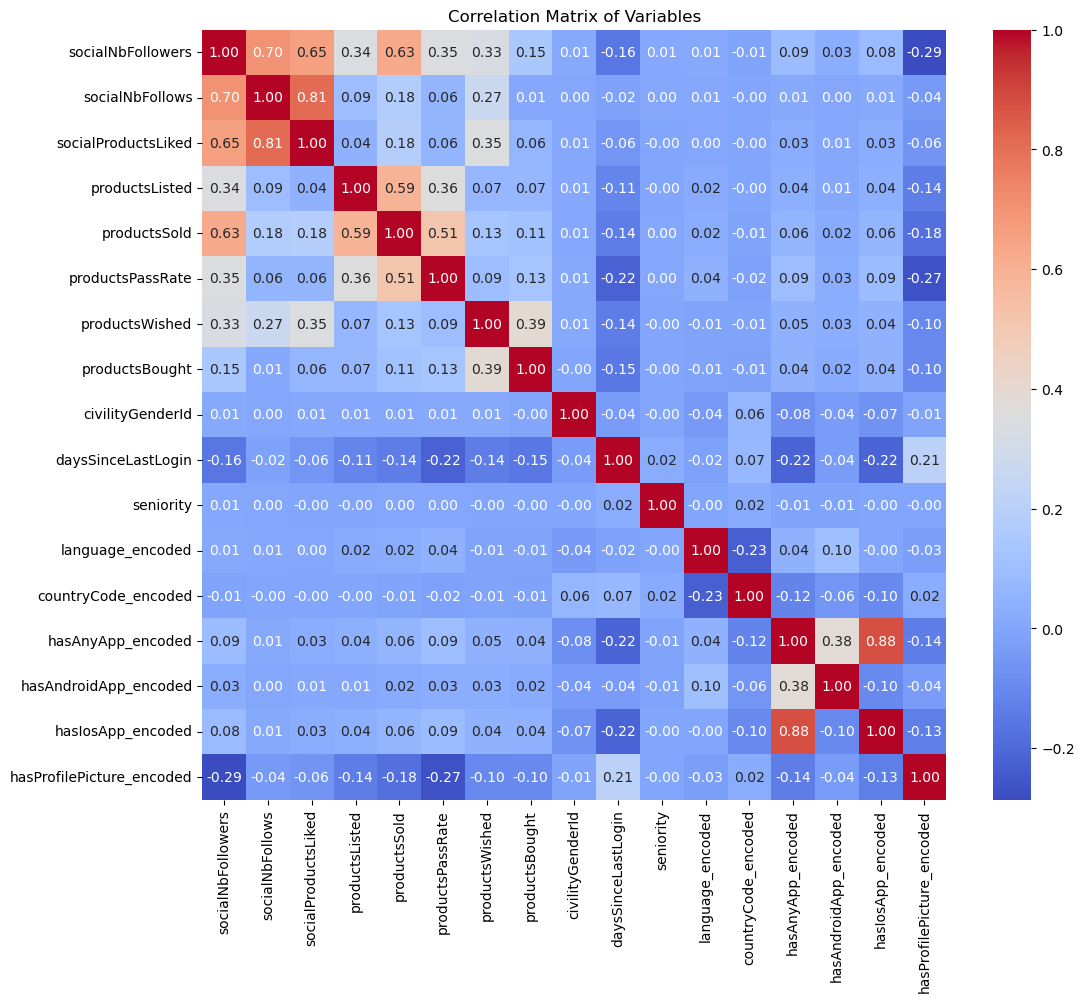

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df3.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()


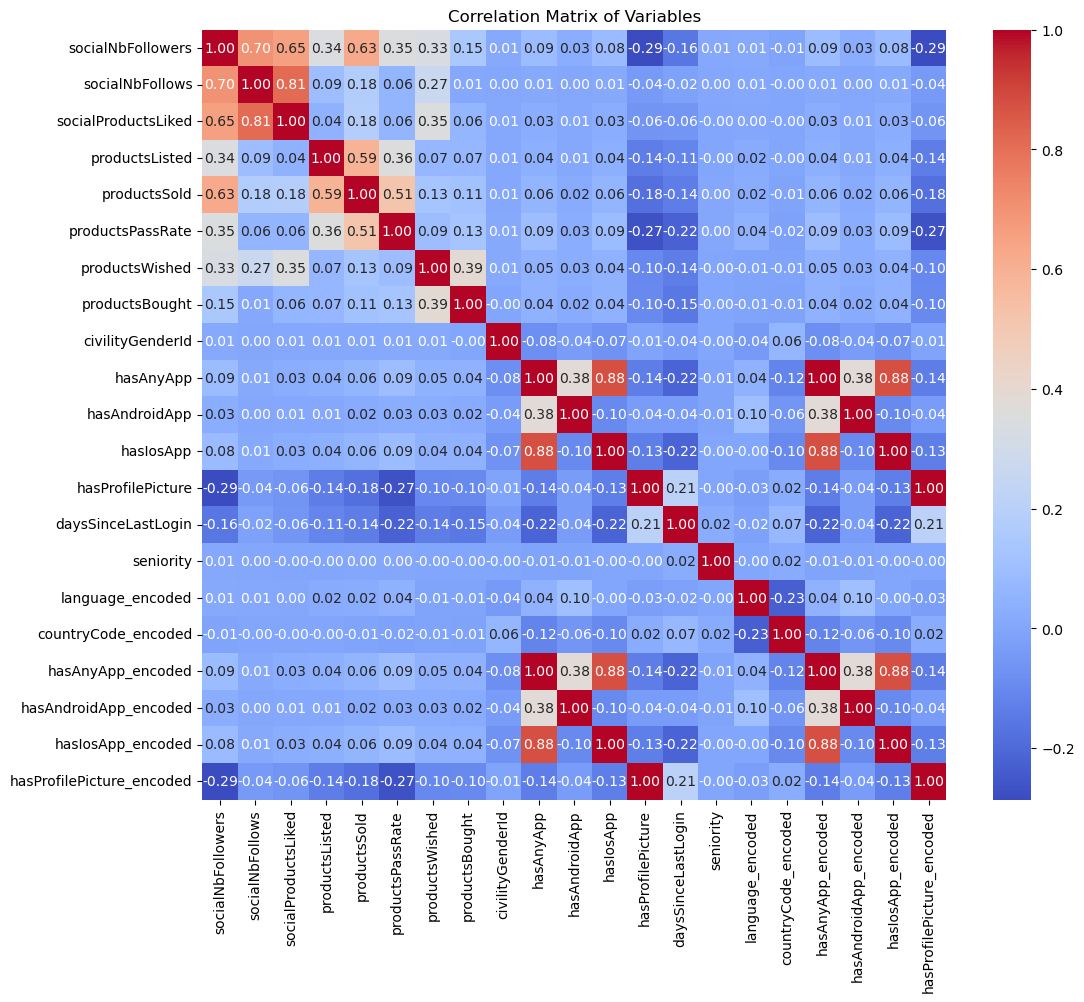

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

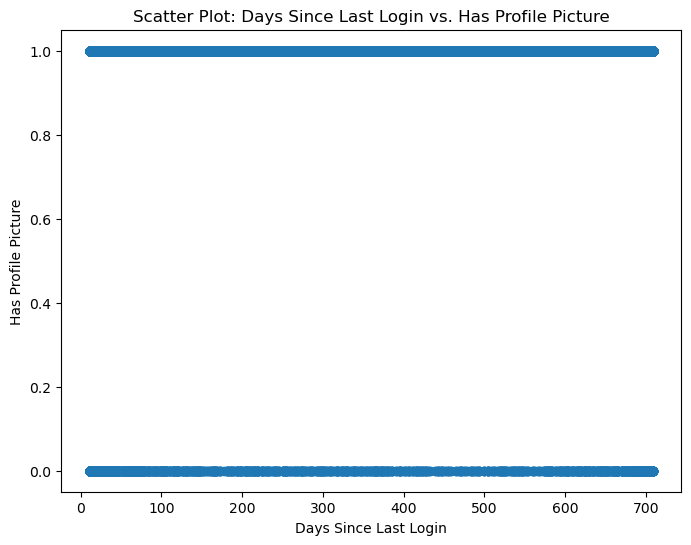

In [20]:
#Negative Correlation of 'daysSinceLastLogin' and 'hasProfilePicture':
#To visualize the negative correlation between 'daysSinceLastLogin' and 'hasProfilePicture', you can create scatter plots:

plt.figure(figsize=(8, 6))
plt.scatter(df['daysSinceLastLogin'], df['hasProfilePicture'])
plt.xlabel('Days Since Last Login')
plt.ylabel('Has Profile Picture')
plt.title('Scatter Plot: Days Since Last Login vs. Has Profile Picture')
plt.show()


Text(0.5, 1.0, 'Heatmap of Correlation Matrix for All Users')

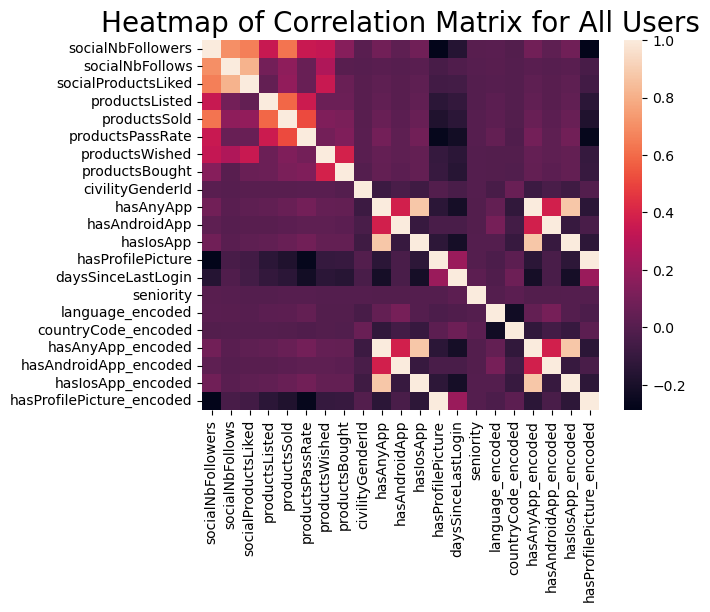

In [21]:
import seaborn as sns
a=sns.heatmap(df2.corr()) 
a.set_title('Heatmap of Correlation Matrix for All Users', fontsize = 20)

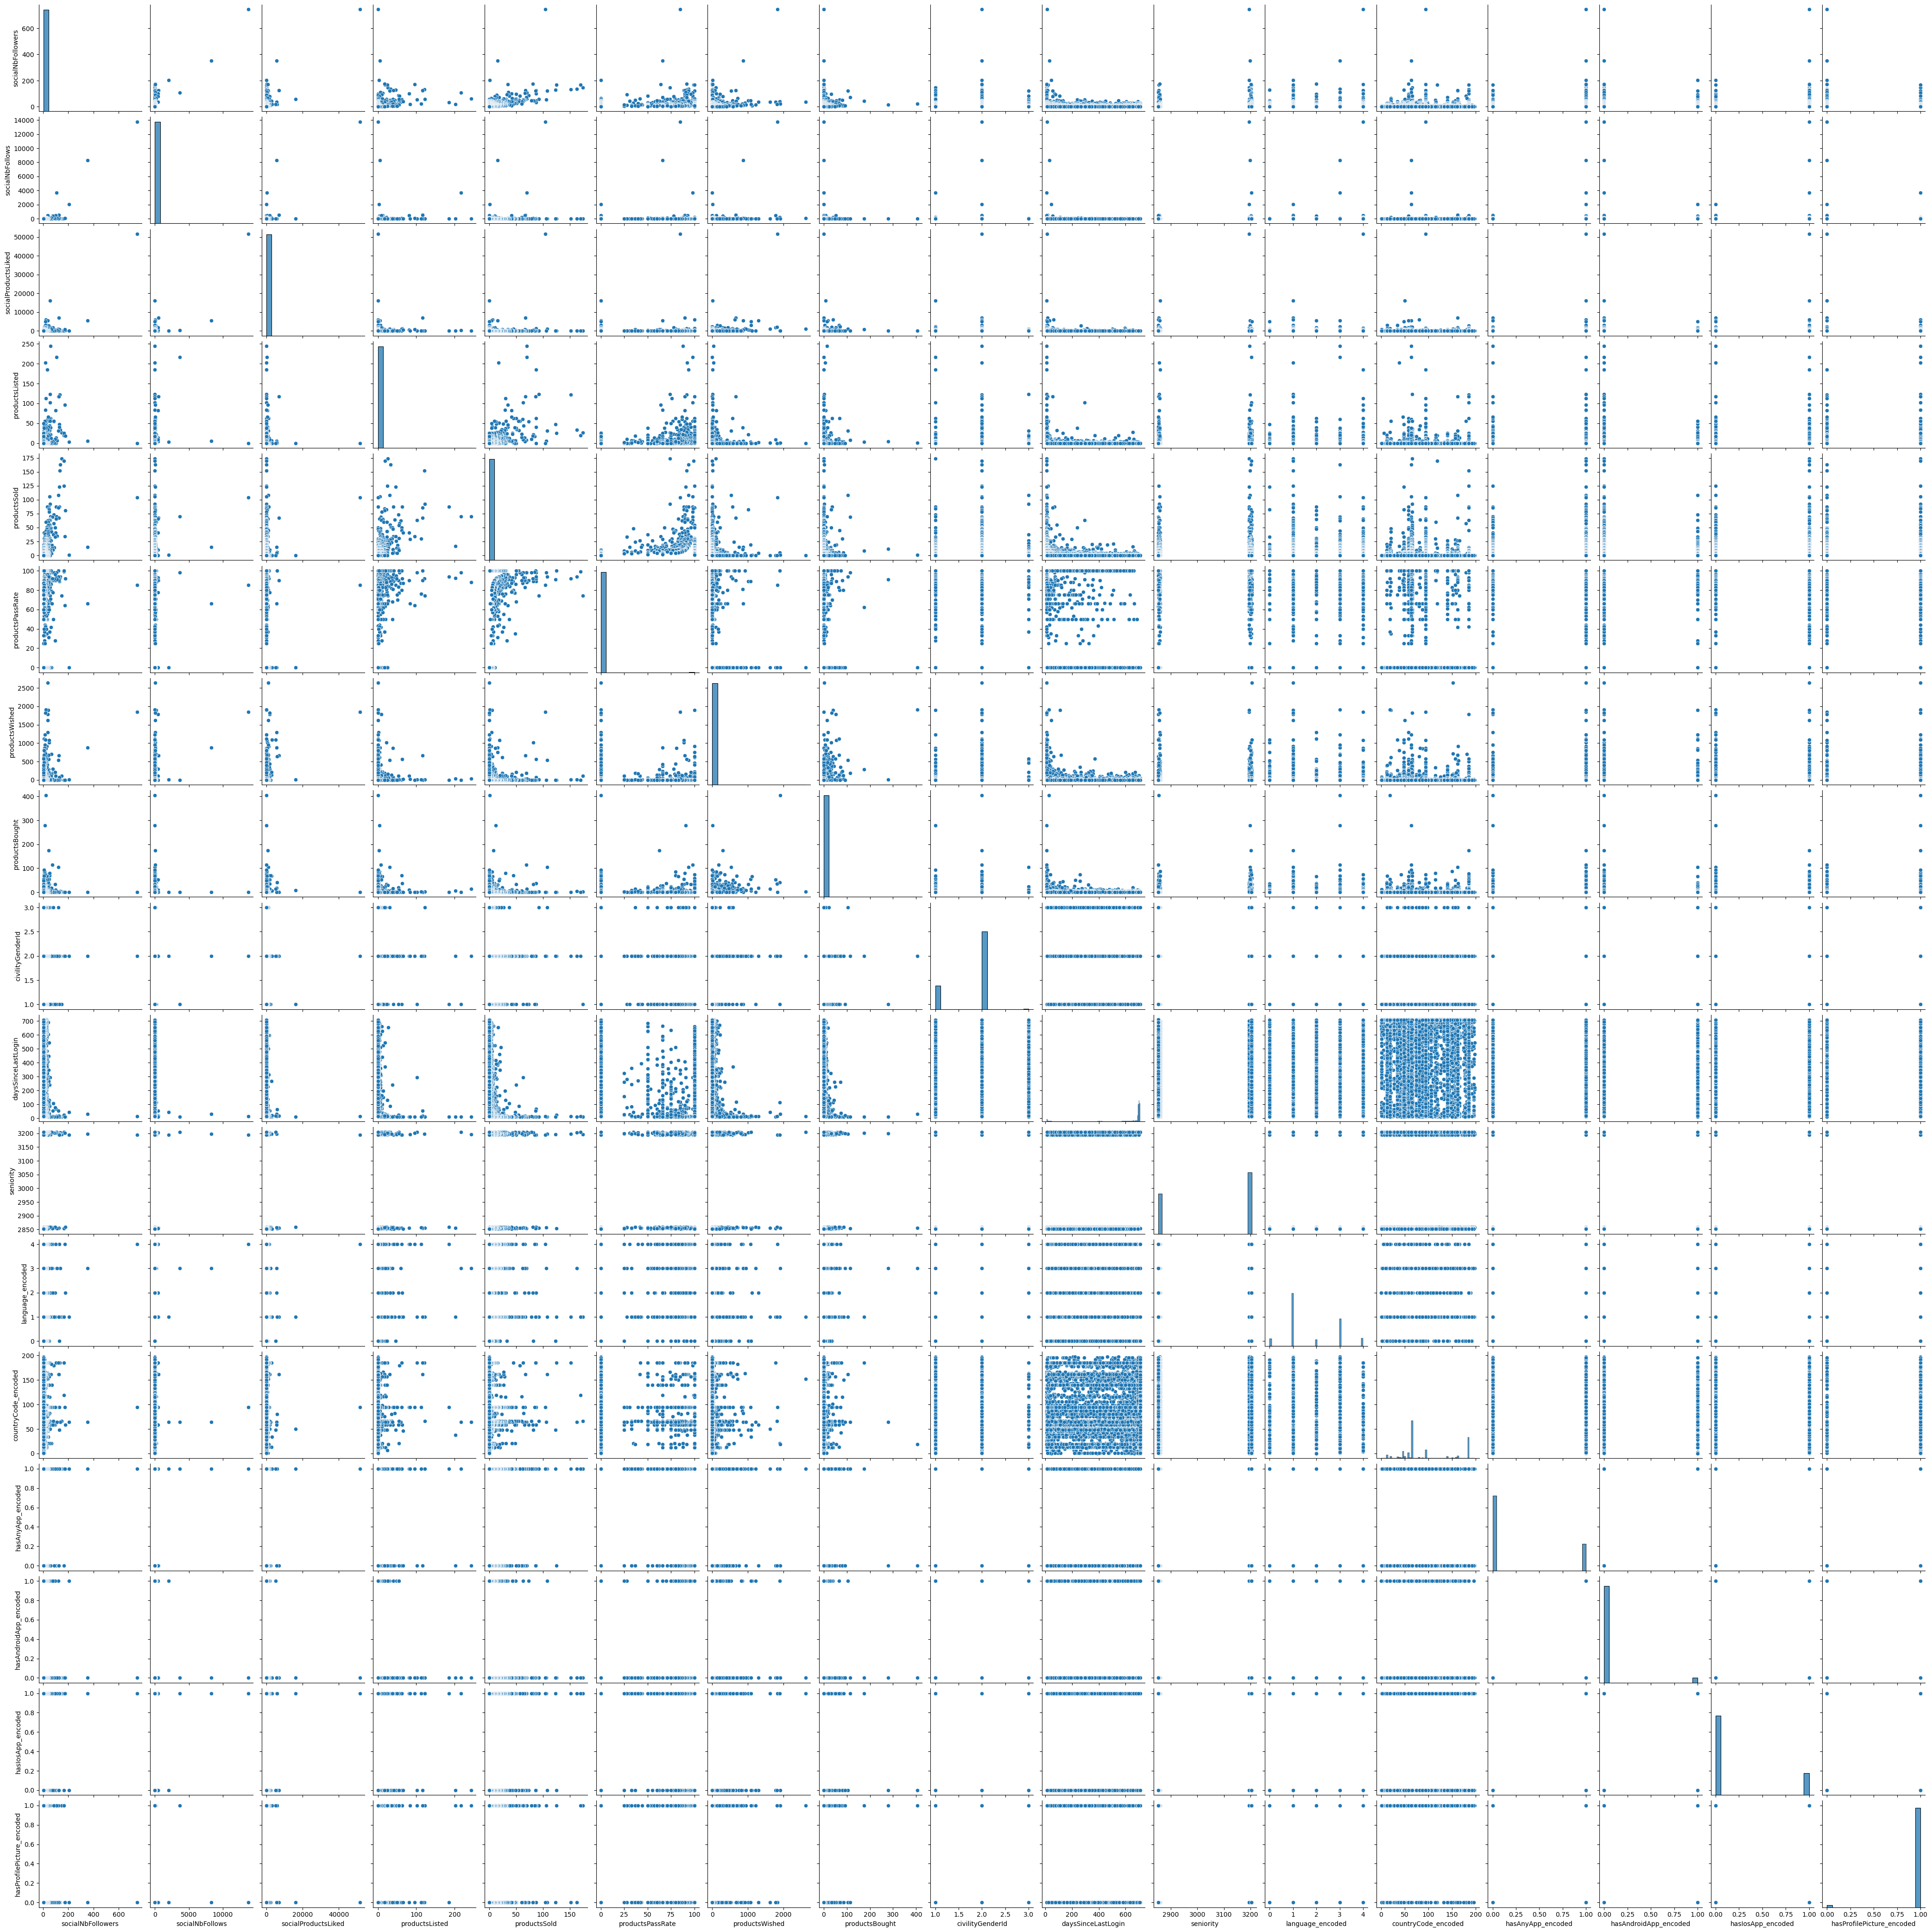

In [22]:
sns.pairplot(df3)

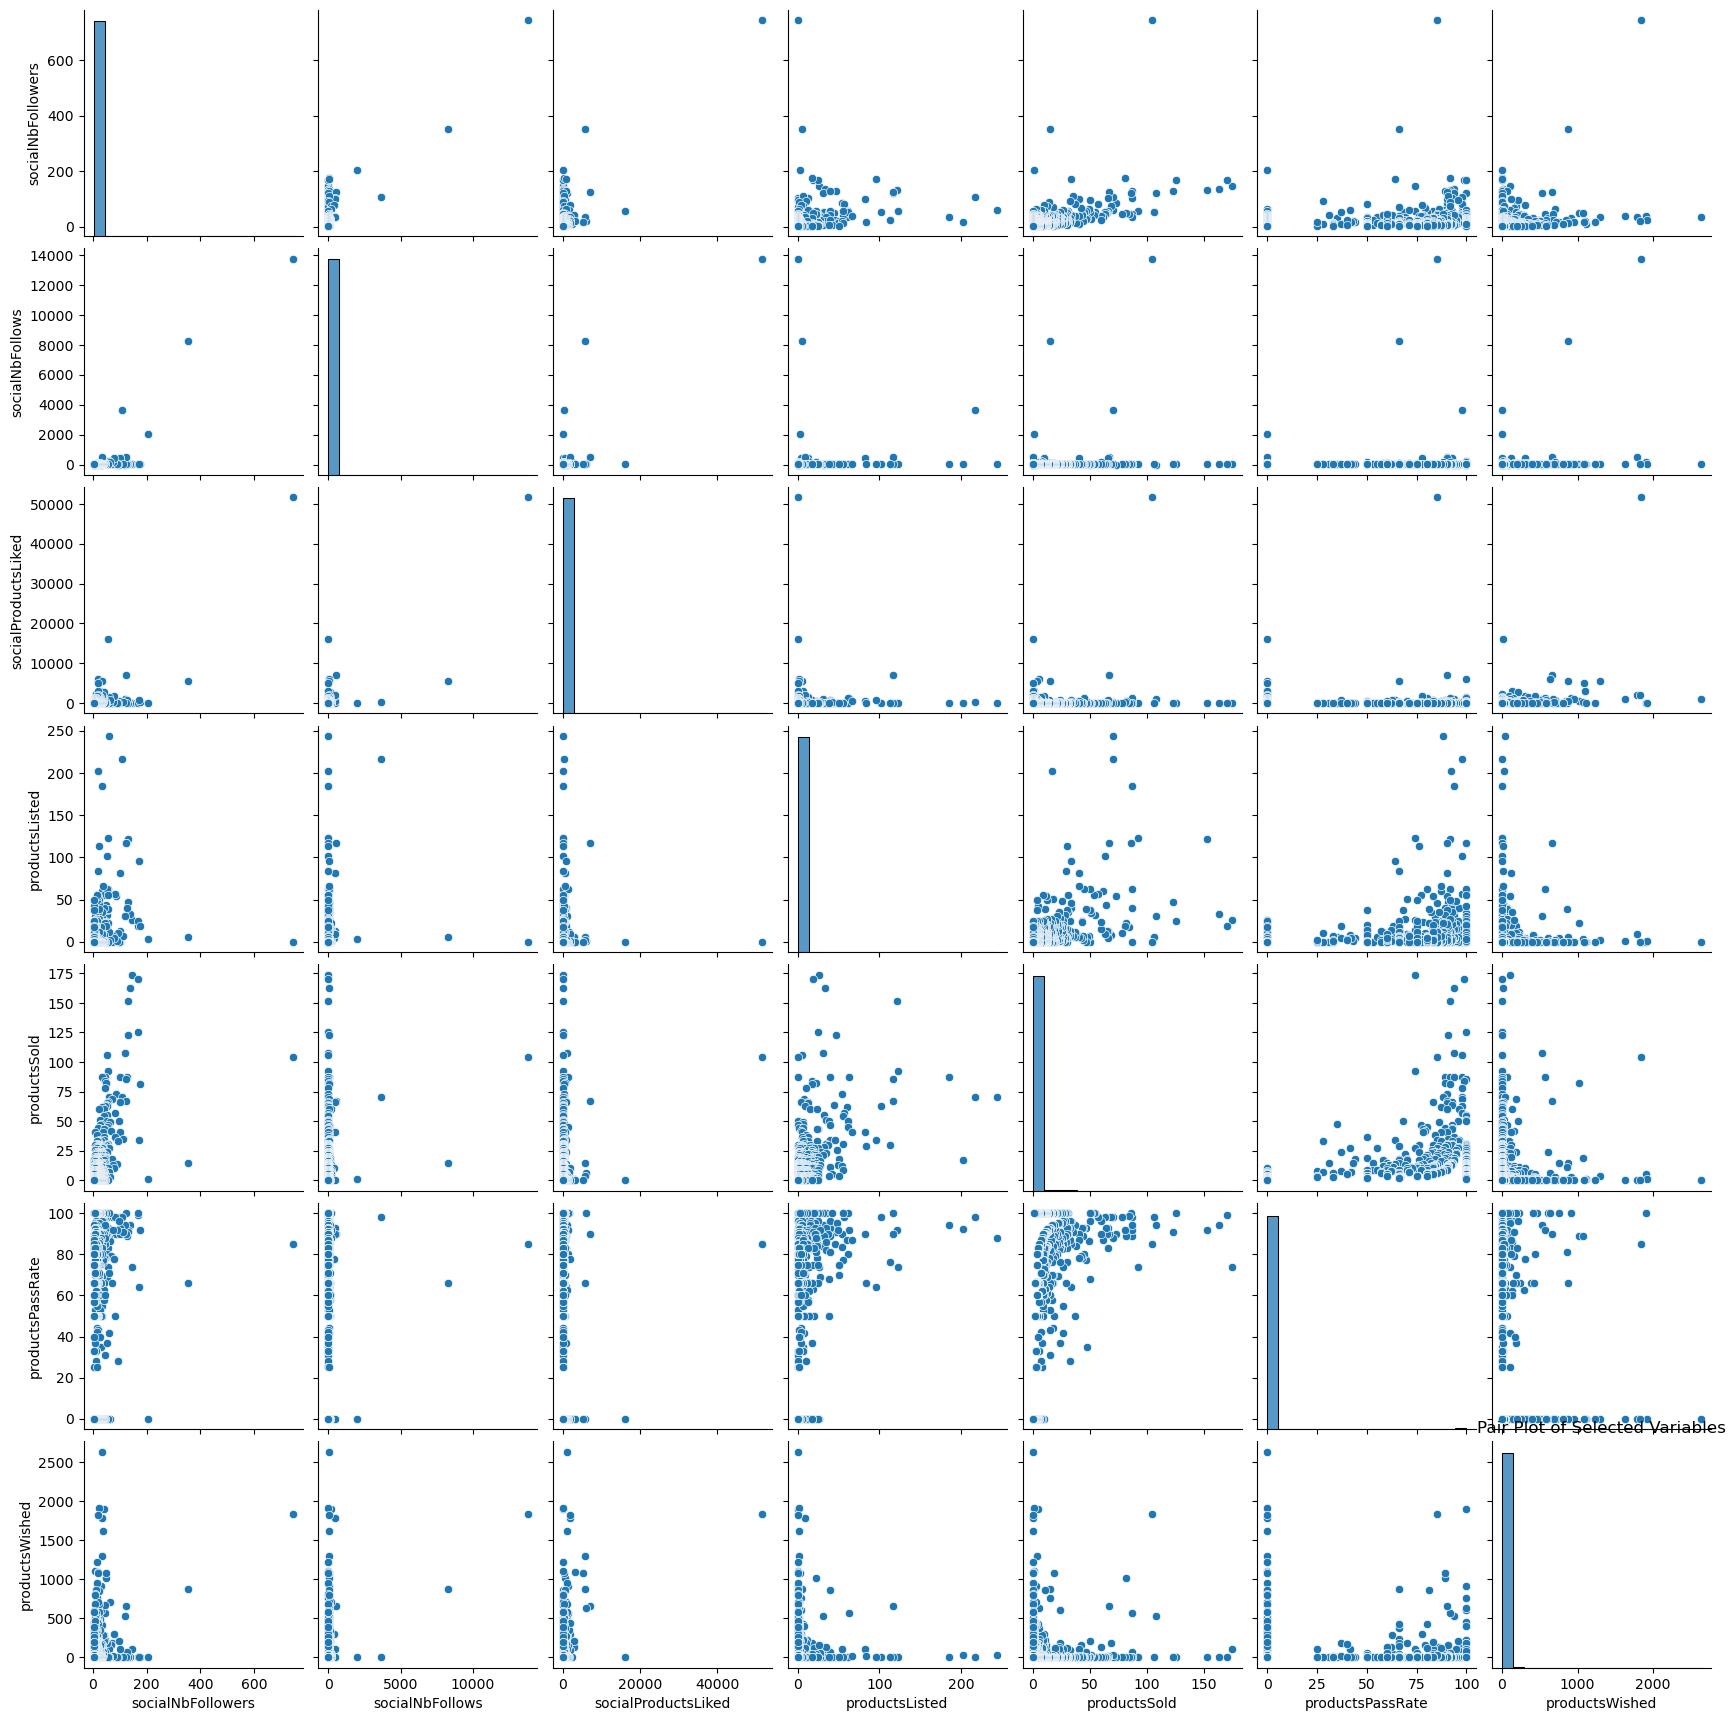

In [23]:
#Positive Correlation of Certain Variables:
#To visualize the positive correlation between 'socialNbFollowers', 'socialNBFollows', 'socialproductsLiked', 'productsListed', 'productsSold', 'productsPassRate', and 'productsWished', you can create scatter plots or pair plots

# Pair plot of selected variables
sns.pairplot(df[['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
                 'productsListed', 'productsSold', 'productsPassRate', 'productsWished']])
plt.title('Pair Plot of Selected Variables')
plt.show()


In [24]:
print("Original dataset before filtering", df2.shape)

print("Remainging data after filtering variables with no correlations:\n",df3.shape)
df_final = df3.sample(frac = 0.3)
print("\n Final shrinking columns: \n",df_final.columns)
print("\n Final shrinking data: \n",df_final.shape)


Original dataset before filtering (98913, 23)
Remainging data after filtering variables with no correlations:
 (98913, 17)

 Final shrinking columns: 
 Index(['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked',
       'productsListed', 'productsSold', 'productsPassRate', 'productsWished',
       'productsBought', 'civilityGenderId', 'daysSinceLastLogin', 'seniority',
       'language_encoded', 'countryCode_encoded', 'hasAnyApp_encoded',
       'hasAndroidApp_encoded', 'hasIosApp_encoded',
       'hasProfilePicture_encoded'],
      dtype='object')

 Final shrinking data: 
 (29674, 17)


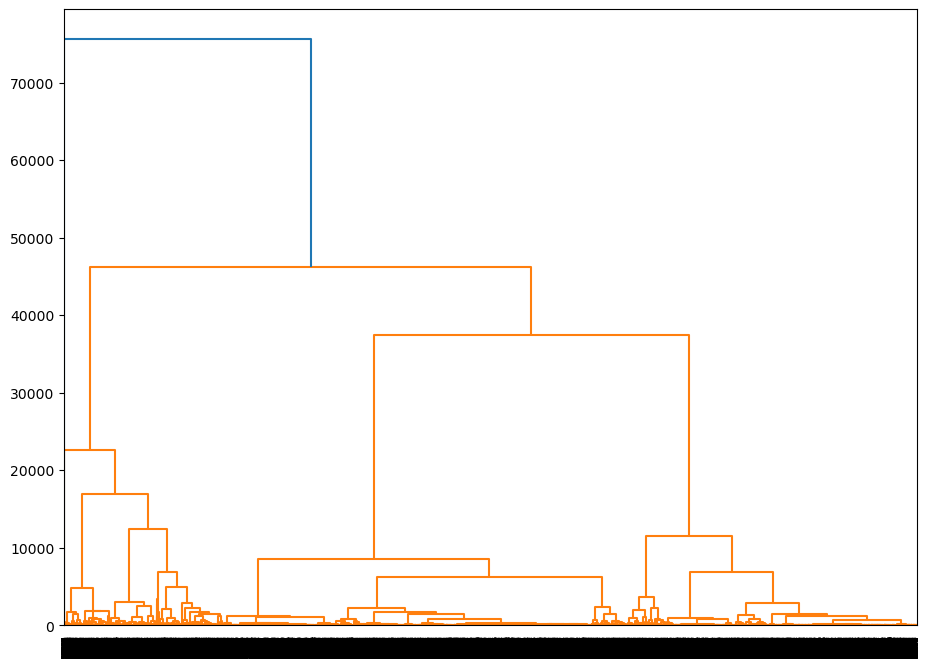

In [25]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
fig = plt.figure(figsize = (11, 8))
dendogram = sch.dendrogram(sch.linkage(df_final,method = 'ward'))

5. Define filter function

In [26]:
# using Jeffrey's Helpers to filter dataframes 

def helper_has_fields_compared_to(df, columns, target, what, operator):

    col = columns[0]
    if operator == '>':
        res = (df[col] > target)
    elif operator == '>=':
        res = (df[col] >= target)
    elif operator == '<=':
        res = (df[col] <= target)
    elif operator == '<':
        res = (df[col] < target)
    elif operator == '==':
        res = (df[col] == target)
    elif operator == '!=':
        res = (df[col] != target)  
    for col in columns[1:]:
        if operator == '>':
            tmp = (df[col] > target)
        elif operator == '>=':
            tmp = (df[col] >= target)
        elif operator == '<=':
            tmp = (df[col] <= target)
        elif operator == '<':
            tmp = (df[col] < target)
        elif operator == '==':
            tmp = (df[col] == target)
        elif operator == '!=':
            tmp = (df[col] != target)
        if what == 'all':
            res = res & tmp
        elif what in ['any']:
            res = res | tmp
    return res

def helper_has_any_field_greater_than(df, columns, target):
    #Returns lines of the dataframe where any of value of the specified columns is greater than the target.
    res = helper_has_fields_compared_to(df, columns, target, 'any', '>')
    return res

def helper_has_any_field_smaller_than(df, columns, target):
    #Returns lines of the dataframe where any of value of the specified columns is smaller than the target.
    res = helper_has_fields_compared_to(df, columns, target, 'any', '<')
    return res

def helper_has_all_field_greater_than(df, columns, target):
    #Returns lines of the dataframe where all of value of the specified columns is smaller than the target.
    res = helper_has_fields_compared_to(df, columns, target, 'all', '>')
    return res

def helper_has_all_field_smaller_than(df, columns, target):
    #Returns lines of the dataframe where all of value of the specified columns is smaller than the target.
    res = helper_has_fields_compared_to(df, columns, target, 'all', '<')
    return res

def helper_has_all_field_equal_to(df, columns, target):
    #Returns lines of the dataframe where all of value of the specified columns is equal to the target.
    res = helper_has_fields_compared_to(df, columns, target, 'all', '==')
    return res
    


In [27]:
# Total Users
print(f"Total users: {df3.shape[0]} records with {df3.shape[1]} columns")

# Inactive Users
Inactive_db=df3[helper_has_all_field_smaller_than(df3,['socialProductsLiked', 'productsListed',
      'productsPassRate', 'productsWished', 'productsListed','productsSold','productsBought'],1)]
Inactive_db.dataframeName = "Inactive Users"
print(f"Inactive users: {Inactive_db.shape[0]} records with {Inactive_db.shape[1]} columns")
#Inactive_db.sample(12)

# Active Users
Active_db=df3[helper_has_any_field_greater_than(df3,['socialProductsLiked', 'productsListed',
      'productsPassRate', 'productsWished', 'productsListed','productsSold','productsBought'],0)]
Inactive_db.dataframeName = "Active Users"
print(f"Active users: {Active_db.shape[0]} records with {Active_db.shape[1]} columns")

Total users: 98913 records with 17 columns
Inactive users: 77274 records with 17 columns
Active users: 21639 records with 17 columns


In [28]:
# Total Users
print(f"Total users: {df_final.shape[0]} records with {df_final.shape[1]} columns")

# Inactive Users
Inactive_db=df_final[helper_has_all_field_smaller_than(df_final,['socialProductsLiked', 'productsListed',
      'productsPassRate', 'productsWished', 'productsListed','productsSold','productsBought'],1)]
Inactive_db.dataframeName = "Inactive Users"
print(f"Inactive users: {Inactive_db.shape[0]} records with {Inactive_db.shape[1]} columns")
#Inactive_db.sample(12)

# Active Users
Active_db=df_final[helper_has_any_field_greater_than(df_final,['socialProductsLiked', 'productsListed',
      'productsPassRate', 'productsWished', 'productsListed','productsSold','productsBought'],0)]
Inactive_db.dataframeName = "Active Users"
print(f"Active users: {Active_db.shape[0]} records with {Active_db.shape[1]} columns")

Total users: 29674 records with 17 columns
Inactive users: 23131 records with 17 columns
Active users: 6543 records with 17 columns


In [29]:
# Actual Users with at least one bought or sold
Users_db = df3[helper_has_any_field_greater_than(df3,['productsSold','productsBought'],0)]
print(f"Actual Users: {Users_db.shape[0]} ")
#Users_db.sample(12)

# Active Actual Users with social interaction except transaction
AActive_db = Users_db[helper_has_any_field_greater_than(Users_db,['socialProductsLiked', 'productsListed',
       'productsPassRate', 'productsWished'], 0)]
AActive_db.dataframeName = "Active Actual Users"
print(f"Actal Active Users: {AActive_db.shape[0]}")
#Active_db.sample(12)

## Actual Buyers
buyers_db = df3[df3.productsBought > 0]
buyers_db.dataframeName = "Buyers"
print("Actual buyers: ", buyers_db.shape[0])


Actual Users: 6893 
Actal Active Users: 4894
Actual buyers:  5419


In [30]:
## Sellers
sellers_db = df3[(df3.productsListed > 0) | (df3.productsSold > 0)]
sellers_db.dataframeName = "Prospecting Sellers"
print("Prospecting sellers: ",sellers_db.shape[0])

### actual sellers (at least 1 product sold)
successful_sellers_db = df3[df3.productsSold > 0]
successful_sellers_db.dataframeName = "Actual sellers"
print("Actual sellers: ", successful_sellers_db.shape[0])

# Social Users with no transaction but social interaction
#by looking at the data, we could easily conclude that 
# each new account is automatically assigned 3 followers and 8 accounts to follow
social_db = df3[ (df3['socialNbFollowers'] != 3) | (df3['socialNbFollows'] != 8) ]
social_db1=social_db[helper_has_all_field_smaller_than(social_db,['productsSold','productsBought'],1)]
#Among those social users, filter only those active on products 
market_social_db = social_db1[helper_has_any_field_greater_than(social_db1, ['socialProductsLiked', 'productsListed',
       'productsPassRate', 'productsWished'], 0)]
print(f"Potential Social Users: {market_social_db.shape[0]}")

Prospecting sellers:  2719
Actual sellers:  2036
Potential Social Users: 3679


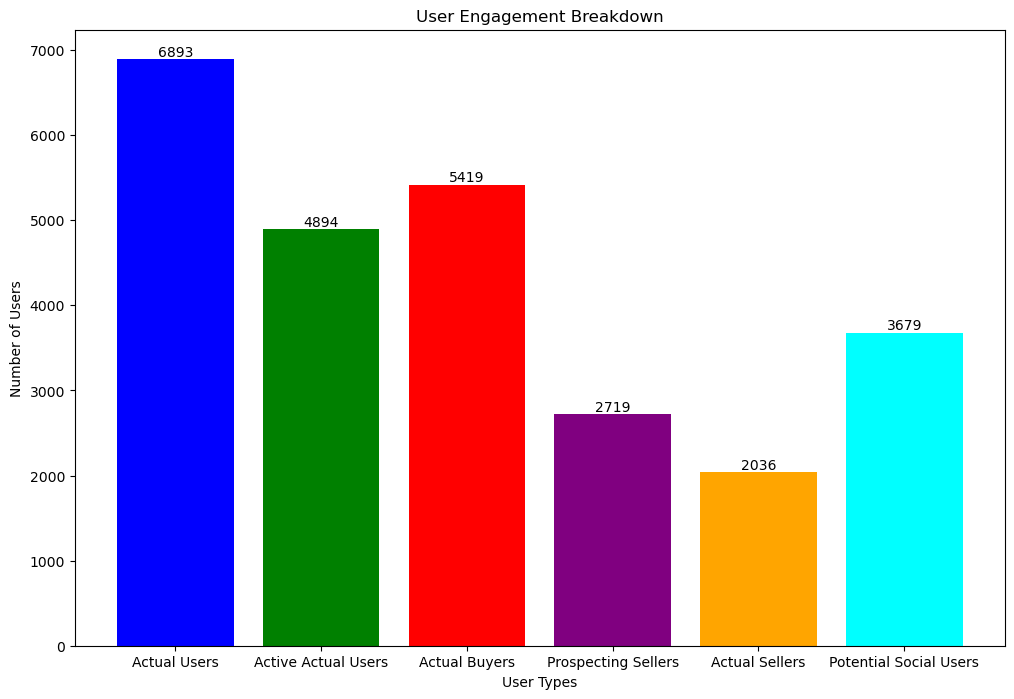

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df3' is your DataFrame and 'helper_has_any_field_greater_than' is a predefined function

# Helper function to check if any specified columns have values greater than a threshold
def helper_has_any_field_greater_than(df, columns, threshold):
    return df[columns].gt(threshold).any(axis=1)

# Helper function to check if all specified columns have values smaller than a threshold
def helper_has_all_field_smaller_than(df, columns, threshold):
    return df[columns].lt(threshold).all(axis=1)

# Actual Users with at least one bought or sold
Users_db = df3[helper_has_any_field_greater_than(df3, ['productsSold', 'productsBought'], 0)]
actual_users_count = Users_db.shape[0]

# Active Actual Users with social interaction except transaction
AActive_db = Users_db[helper_has_any_field_greater_than(Users_db, ['socialProductsLiked', 'productsListed', 'productsPassRate', 'productsWished'], 0)]
active_actual_users_count = AActive_db.shape[0]

# Actual Buyers
buyers_db = df3[df3.productsBought > 0]
actual_buyers_count = buyers_db.shape[0]

# Sellers
sellers_db = df3[(df3.productsListed > 0) | (df3.productsSold > 0)]
prospecting_sellers_count = sellers_db.shape[0]

# Actual Sellers (at least 1 product sold)
successful_sellers_db = df3[df3.productsSold > 0]
actual_sellers_count = successful_sellers_db.shape[0]

# Social Users with no transaction but social interaction
social_db = df3[(df3['socialNbFollowers'] != 3) | (df3['socialNbFollows'] != 8)]
social_db1 = social_db[helper_has_all_field_smaller_than(social_db, ['productsSold', 'productsBought'], 1)]
market_social_db = social_db1[helper_has_any_field_greater_than(social_db1, ['socialProductsLiked', 'productsListed', 'productsPassRate', 'productsWished'], 0)]
potential_social_users_count = market_social_db.shape[0]

# Plotting the results
user_types = ['Actual Users', 'Active Actual Users', 'Actual Buyers', 'Prospecting Sellers', 'Actual Sellers', 'Potential Social Users']
counts = [actual_users_count, active_actual_users_count, actual_buyers_count, prospecting_sellers_count, actual_sellers_count, potential_social_users_count]

plt.figure(figsize=(12, 8))
bars = plt.bar(user_types, counts, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.xlabel('User Types')
plt.ylabel('Number of Users')
plt.title('User Engagement Breakdown')

# Adding the count labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.show()


In [44]:
print(f"""In average, buyers buy {buyers_db.productsBought.sum() / buyers_db.shape[0] :.2f} products. Details are as follows:""")

#successful buyers
Sbuyers_db = df3[df3.productsBought >= 3]
Sbuyers_db.dataframeName = "SBuyers"
print("Accordingly, Successful buyers: ", Sbuyers_db.shape[0])
buyers_db.productsBought.describe()

In average, buyers buy 3.14 products. Details are as follows:
Accordingly, Successful buyers:  1277


count    5419.000000
mean        3.138217
std         9.486478
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       405.000000
Name: productsBought, dtype: float64

In [46]:
print(f"""In average, actual sellers sell {successful_sellers_db.productsSold.sum() / successful_sellers_db.shape[0] :.2f} products. Details are as follows:""")
#successful sellers
Ssellers_db = df3[df3.productsSold >= 6]
Ssellers_db.dataframeName = "SSellers"
print("Accordingly, Successful sellers: ", Ssellers_db.shape[0])
successful_sellers_db.productsSold.describe()

In average, actual sellers sell 5.91 products. Details are as follows:
Accordingly, Successful sellers:  458


count    2036.000000
mean        5.907171
std        13.626529
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       174.000000
Name: productsSold, dtype: float64

In [47]:
productsH_db = df3[df3.productsPassRate >= 90]
productsH_db.dataframeName = "Best quality's store"
print("Numbers of sellers with the highest quality: ", productsH_db.shape[0])

productsMh_db = df3[(df3.productsPassRate >= 80) & (df3.productsPassRate < 90)]
productsMh_db.dataframeName = "medium-high quality's store"
print("Numbers of sellers with the Medium-high quality: ", productsMh_db.shape[0])

productsS_db = df3[(df3.productsPassRate >= 60) &  (df3.productsPassRate < 80)]
productsS_db.dataframeName = "Standard qualisty's store"
print("Numbers of sellers with the stadard quality: ", productsS_db.shape[0])

productsU_db = df3[(df3.productsPassRate < 60) &  (df3.productsPassRate > 0)]
productsU_db.dataframeName = "Unqualified store"
print("Numbers of sellers with low quality: ", productsU_db.shape[0]+
      (successful_sellers_db.shape[0]-productsH_db.shape[0]-productsMh_db.shape[0]-productsS_db.shape[0]-productsU_db.shape[0]))

Numbers of sellers with the highest quality:  539
Numbers of sellers with the Medium-high quality:  129
Numbers of sellers with the stadard quality:  174
Numbers of sellers with low quality:  1194


In [48]:
print(f"""In average, active low quality sellers sell {productsU_db.productsSold.sum() / sellers_db.shape[0] :.2f} """)
print(f"""In average, active standard quality sellers sell {productsS_db.productsSold.sum() / sellers_db.shape[0] :.2f} """)
print(f"""In average, active medium-high quality sellers sell {productsMh_db.productsSold.sum() / sellers_db.shape[0] :.2f} """)
print(f"""In average, active high quality sellers sell {productsH_db.productsSold.sum() / sellers_db.shape[0] :.2f} products. Details are as follows:""")
productsH_db.productsSold.describe()

In average, active low quality sellers sell 0.24 
In average, active standard quality sellers sell 0.60 
In average, active medium-high quality sellers sell 0.77 
In average, active high quality sellers sell 2.31 products. Details are as follows:


count    539.000000
mean      11.653061
std       20.687448
min        1.000000
25%        2.000000
50%        4.000000
75%       11.000000
max      170.000000
Name: productsSold, dtype: float64